## 作品4. 以蒙地卡羅實驗驗證 J-B 檢定統計量

#### 姓名 : 林詠翔   $\quad$  學號 : 410977095  $\quad$   系級: 會計三

#### 目標 :  

#### 1. 用蒙地卡羅法驗證J - B 檢定統計量好壞
#### 2. 以樣本是否為常態判斷能否拒絕

#### 所需套件 :

- scipy.stats 中的 skew , kurtosis, chi2 

- matplotlib.pyplot

- numpy 

<hr>

#### 1. 統計量 G1 = $\sqrt{\frac{n}{6}}\hat{s}$

- 樣本來自標準常態 N ( 0,1 ) 的 n 個隨機樣本

- 樣本數 n = 10, 20, 30, 50, 100, 300, 500

- 針對每個樣本數 n，模擬次數皆為 N=50,000

#### 注意事項與討論 :

- 當樣本數越大時，分配越趨近常態非配

- 同理套用在CDF上，當樣本數愈大，ECDF愈趨近CDF

- 從前2點證明，當樣本數越大，分布愈接近 N ( 0,1 )

- G1 統計量分布與鐘型分布十分接近



Text(0.5, 1.0, 'G1 when n=500')

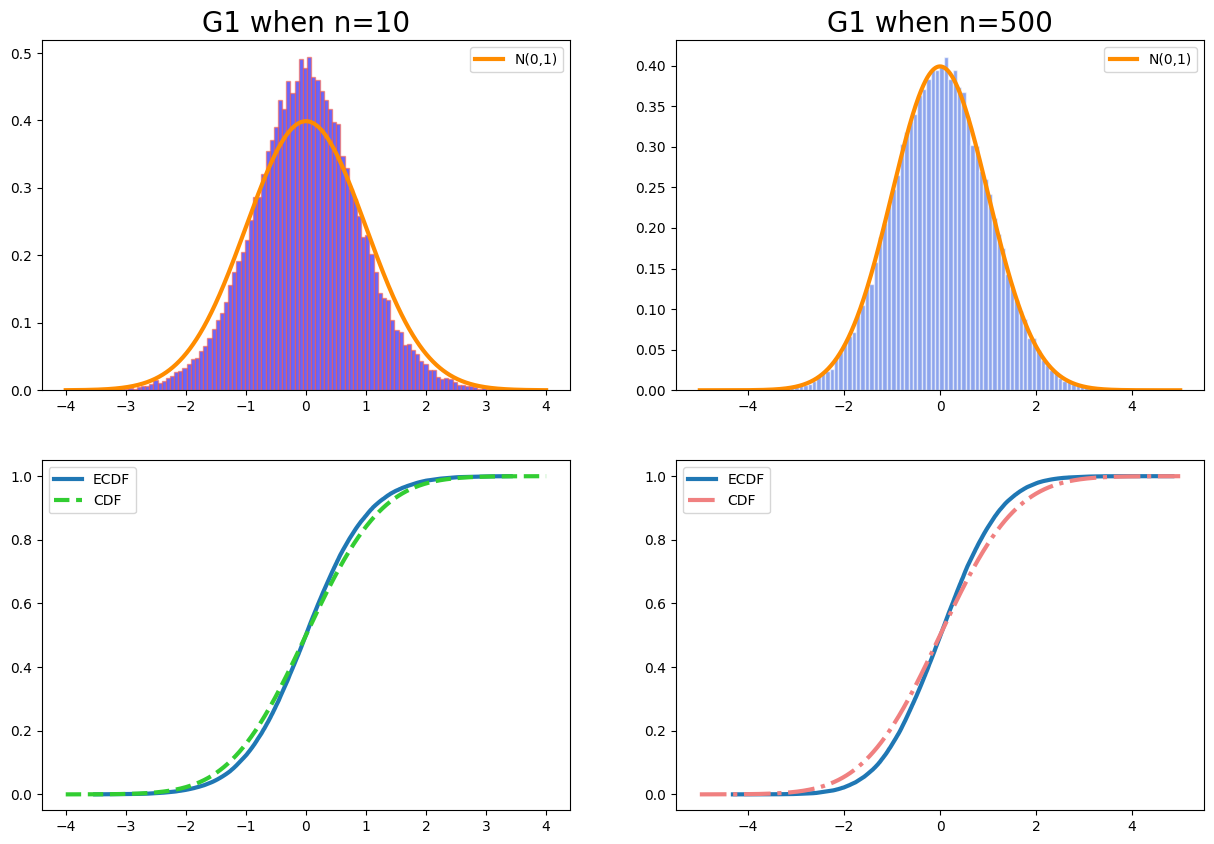

In [208]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import skew,norm 
n=[10,20,30,50,100,300,500] # 樣本數
N=50000  # 模擬次數
mu=0
std=1
mean=0
G1=np.zeros(len(n)).tolist()

x=np.linspace(-4,4,1000)
y=norm.pdf(x.reshape(-1,1),mean,std)
y_cdf=norm.cdf(x.reshape(-1,1))
x_500=np.linspace(-5,5,1000)
y_500=norm.pdf(x_500.reshape(-1,1),mean,std)
y_500_cdf=norm.cdf(x.reshape(-1,1))

fig,axes=plt.subplots(2,2,figsize=(15,10))
for i in range(len(n)):
    x1=norm.rvs(mu,std,size=(n[i],N))
    G1[i]=np.sqrt(n[i]/6)*skew(x1,bias=False)
    
axes[0][0].hist(G1[n.index(10)],alpha=0.6,bins=100,color="b",edgecolor="tomato",density=True)
axes[0][0].plot(x,y,color="darkorange",lw=3,label="N(0,1)")
axes[0][0].legend()

axes[0][1].hist(G1[n.index(500)],alpha=0.6,bins=100,color="royalblue",edgecolor="white",density=True)
axes[0][1].plot(x_500,y_500,color="darkorange",lw=3,label="N(0,1)")
axes[0][1].legend()

axes[1][0].plot(np.sort(G1[n.index(10)]),np.arange(1,N+1)/N,lw=3,label="ECDF")
axes[1][0].plot(x,y_cdf,color="limegreen",lw=3,ls="--",label="CDF")
axes[1][1].plot(np.sort(G1[n.index(500)]),np.arange(1,N+1)/N,lw=3,label="ECDF")
axes[1][1].plot(x_500,y_500_cdf,lw=3,ls="-.",color="lightcoral",label="CDF")
axes[1][0].legend()
axes[1][1].legend()

axes[0][0].set_title("G1 when n=10",fontsize=20)
axes[0][1].set_title("G1 when n=500",fontsize=20)








     






#### 2. 統計量 G2 = $\sqrt{\frac{n}{24}}\left(\hat{k}-3\right)$

- 樣本來自標準常態 N ( 0,1 ) 的 n 個隨機樣本

- 樣本數 n = 10, 20, 30, 50, 100, 300, 500

- 針對每個樣本數 n，模擬次數皆為 N=50,000

注意事項與討論 :

- 當樣本數 n = 10 時，分布為右偏 ，樣本數 = 500 時 ， 偏度漸漸變小

- 和上題相同，當樣本數愈大時，分布愈接近 N ( 0,1 ) 常態分布

- 根據 scipy.stats的文件，當kurtosis() 中的 fisher參數 = True 時，表示峰度自動減3 ( 為了讓常態分布的峰度為0 )

- n = 500 時 ，與 skew 的差異在於 ， ECDF 更為貼合常態 CDF



Text(0.5, 1.0, 'G2 when n=500')

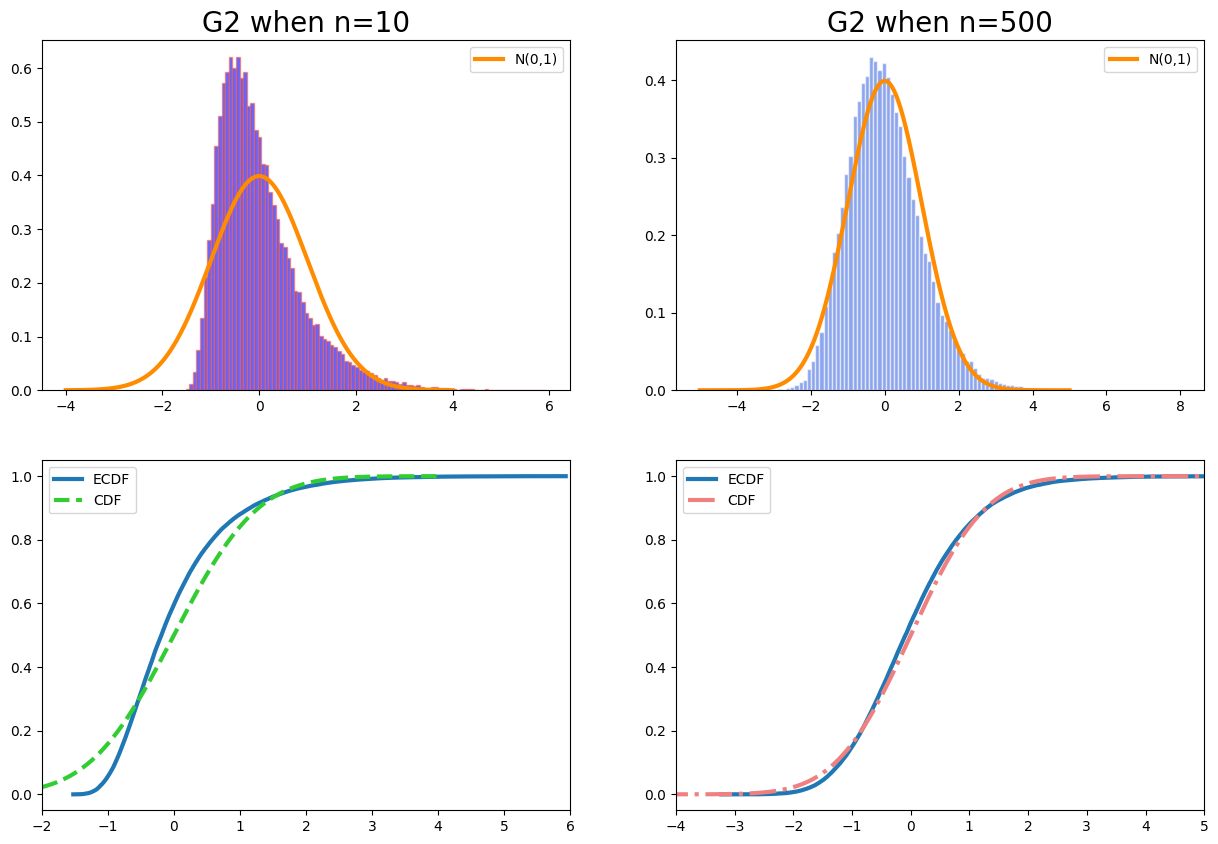

In [212]:
import numpy as np 
from scipy.stats import norm,kurtosis
import matplotlib.pyplot as plt 

n=[10,20,30,50,100,300,500]
N=50000
G2=np.zeros(len(n)).tolist()
mu=0
std=1

x_k=np.linspace(-4,4,1000)
y_k=norm.pdf(x.reshape(-1,1),mean,std)
y_kcdf=norm.cdf(x_k.reshape(-1,1))
x_500k=np.linspace(-5,5,1000)
y_500k=norm.pdf(x_500k.reshape(-1,1),mean,std)
y_500k_cdf=norm.cdf(x_500k.reshape(-1,1))

for i in range(len(n)):    
    x2=norm.rvs(mu,std,size=(n[i],N))        
    G2[i]=np.sqrt(n[i]/24)*(kurtosis(x2,fisher=True,bias=False))

fig,axes=plt.subplots(2,2,figsize=(15,10)) 
axes[0][0].hist(G2[n.index(10)],alpha=0.6,bins=100,color="b",edgecolor="tomato",density=True)
axes[0][0].plot(x_k,y_k,color="darkorange",lw=3,label="N(0,1)")
axes[0][0].legend()

axes[0][1].hist(G2[n.index(500)],alpha=0.6,bins=100,color="royalblue",edgecolor="white",density=True)
axes[0][1].plot(x_500k,y_500k,color="darkorange",lw=3,label="N(0,1)")
axes[0][1].legend()

axes[1][0].plot(np.sort(G2[n.index(10)]),np.arange(1,N+1)/N,lw=3,label="ECDF")
axes[1][0].plot(x_k,y_kcdf,color="limegreen",lw=3,ls="--",label="CDF")
axes[1][1].plot(np.sort(G2[n.index(500)]),np.arange(1,N+1)/N,lw=3,label="ECDF")
axes[1][1].plot(x_500k,y_500k_cdf,lw=3,ls="-.",color="lightcoral",label="CDF")
axes[1][0].legend()
axes[1][1].legend()
axes[1][0].set_xlim([-2,6])
axes[1][1].set_xlim([-4,5])

axes[0][0].set_title("G2 when n=10",fontsize=20)
axes[0][1].set_title("G2 when n=500",fontsize=20)
    


#### 3. 統計量 G3 = G1 + G2 

- 樣本來自標準常態 N ( 0,1 ) 的 n 個隨機樣本

- 樣本數 n = 10, 20, 30, 50, 100, 300, 500

- 針對每個樣本數 n，模擬次數皆為 N=50,000

- 統計量服從卡方分配 $x^{2}(df=2)$

#### 注意事項與討論 : 

- 因 G3 = G1 和 G2 的平方總和 ，因此 X分佈必大於0

- 樣本數愈大，愈趨近卡方分配

- G3 為明顯的右尾分布，其中 n=500 時 最尾端分布較密集




Text(0.5, 1.0, 'G3 when n=500')

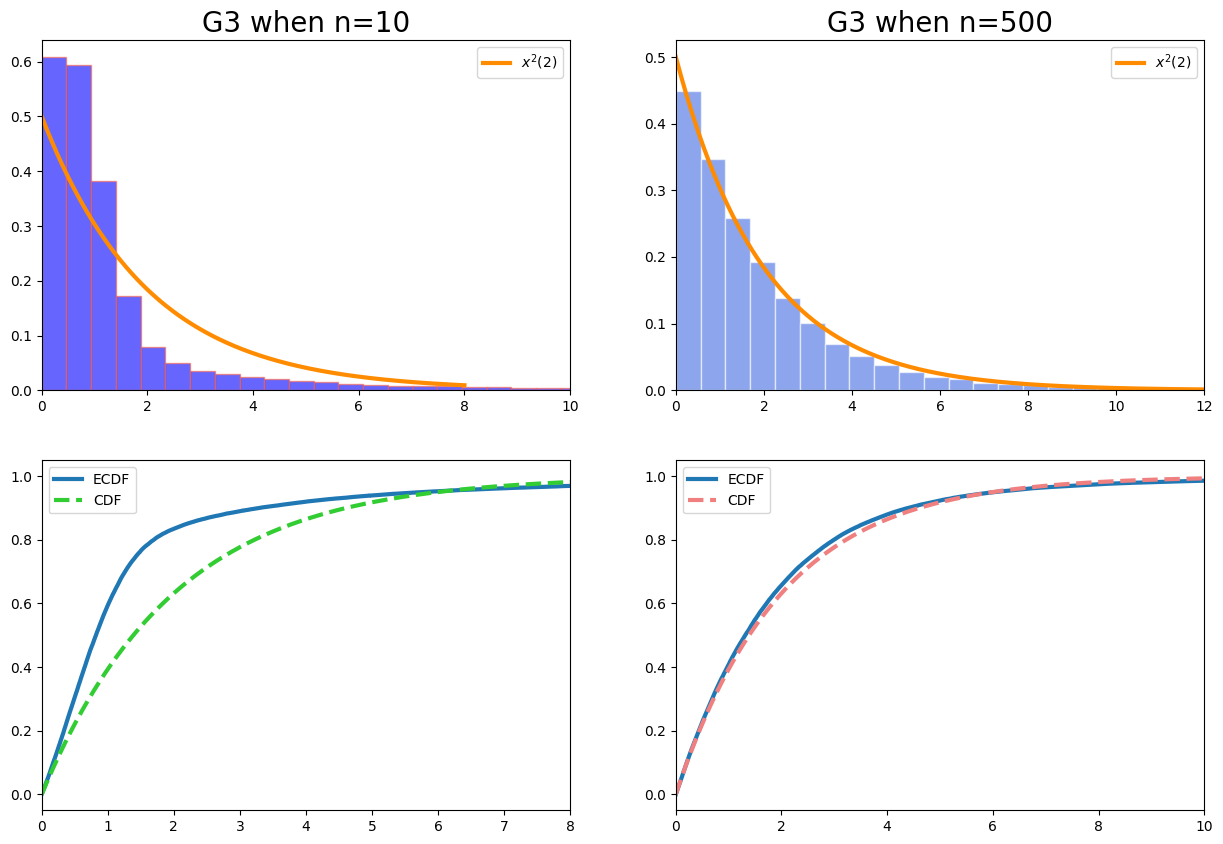

In [173]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, kurtosis, skew, chi2

n = [10, 20, 30, 50, 100, 300, 500]
N = 50000
mu = 0
std = 1
G3 = np.zeros(len(n)).tolist()
x3_pdf = np.linspace(0, 8, 1000)
y_pdf = chi2.pdf(x3_pdf, df=2, loc=mu, scale=std)

x3_500_pdf = np.linspace(0, 12, 1000)
y3_500_pdf = chi2.pdf(x3_500_pdf, df=2, loc=mu, scale=std)

x3_cdf = chi2.cdf(x3_pdf, df=2)
x3_500_cdf = chi2.cdf(x3_500_pdf, df=2)

for i in range(len(n)):
    x3 = norm.rvs(loc=mu, scale=std, size=(n[i], N))
    G1 = np.sqrt(n[i]/6)*skew(x3,bias=False)
    G2 = np.sqrt(n[i]/24)*kurtosis(x3, fisher=True,bias=False)
    G3[i] = G1**2+G2**2

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0][0].hist(G3[n.index(10)], alpha=0.6, bins=100,
                color="b", edgecolor="tomato", density=True)
axes[0][0].plot(x3_pdf, y_pdf, color="darkorange", lw=3, label="$x^{2}(2)$")
axes[0][0].legend()
axes[0][0].set_xlim([0, 10])

axes[0][1].hist(G3[n.index(500)], alpha=0.6, bins=100,
                color="royalblue", edgecolor="white", density=True)
axes[0][1].plot(x3_500_pdf, y3_500_pdf, color="darkorange", lw=3, label="$x^{2}(2)$")
axes[0][1].legend()
axes[0][1].set_xlim([0, 12])

axes[1][0].plot(np.sort(G3[n.index(10)]),
                np.arange(1, N+1)/N, lw=3, label="ECDF")
axes[1][0].plot(x3_pdf, x3_cdf, lw=3, ls="--", color="limegreen", label="CDF")
axes[1][1].plot(np.sort(G3[n.index(500)]),
                np.arange(1, N+1)/N, lw=3, label="ECDF")
axes[1][1].plot(x3_500_pdf, x3_500_cdf, lw=3, ls="--",
                color="lightcoral", label="CDF")
axes[1][0].legend()
axes[1][1].legend()

axes[1][0].set_xlim([0, 8])
axes[1][1].set_xlim([0, 10])

axes[0][0].set_title("G3 when n=10",fontsize=20)
axes[0][1].set_title("G3 when n=500",fontsize=20)



#### 4. 將上述驗證程式改寫為一個副程式 ( 寫成 1 個 function )

#### 注意事項與討論 : 

- 可先用 len ( x ) 統計出資料集的數量

- G3 p-value = 1 - 卡方的cdf 




In [128]:
import numpy as np 
from scipy.stats import norm,skew,kurtosis,chi2 
N=50000
mu=0
std=1
df=2
data_size=2

def JB_test(x):
    n=len(x) # 可得知資料集的數量
    G1=np.sqrt(n/6)*skew(x)
    G2=np.sqrt(n/24)*kurtosis(x,fisher=True)
    stats=G1**2+G2**2
    p_value=1-chi2.cdf(stats,df=df)
    
    return stats,p_value 

data=JB_test(norm.rvs(loc=0,scale=1,size=data_size))

print("G3 when df=2 ,size of data is 2 : {}".format(JB_test(data)[0]))
print("p-value when df=2 ,size of data is 2 : {}".format(JB_test(data)[1]))

    

G3 when df=2 ,size of data is 2 : 0.3333333333333333
p-value when df=2 ,size of data is 2 : 0.8464817248906141


#### 5. 以蒙地卡羅模擬方式，檢驗檢定統計量 G3 的檢定力

#### 步驟 :

- 從下列的分配母體中抽樣：N(0,1), T(3), T(10), T(30), U(0,1), \chi^2(8)

- 抽樣數 n=10, 20, 30, 50, 100, 300, 500

- 實驗次數 N = 50000 

- 型一誤 $\alpha$ = 0.05 

- 對每個分配母體與樣本數，分別計算檢定力： Power = P(Reject \; H_0 \;|\; H_a) 

#### 注意事項與討論 :

- power 愈高愈好 ( 代表能發現2組數據之間差異的機率 = 避免錯誤接受虛無假設的機率 ) 

- 從上可知，在 T分配的時候，無論樣本數及自由度，J-B檢定統計量都比 Shapiro-Wilk 檢定還好 

- 在連續型均勻分配 ( U ( 0, 1) ) 情況下，儘管樣本數小的時候，Shapiro-Wilk 檢定力比 J-B 好，但樣本數變大時，2者檢定力逐漸
  一致，在 n >= 300 時，2者檢定力幾乎一致

- 在卡方分配 ( df = 8 ) 情況下 ，檢定力趨勢跟 U ( 0,1 ) 時很類似 ，J-B檢定統計量在樣本數小的情況下，表現比 Shapiro-Wilk
  差，但若樣本數變大，則2者檢定力會逐漸一致

- 在常態分配情況下，J-B 及 Shapiro-Wilk 檢定在不同樣本數下，各有高低，似乎並未有哪一方因樣本數增加，檢定力逐漸比另一方還好
  的情形發生


  


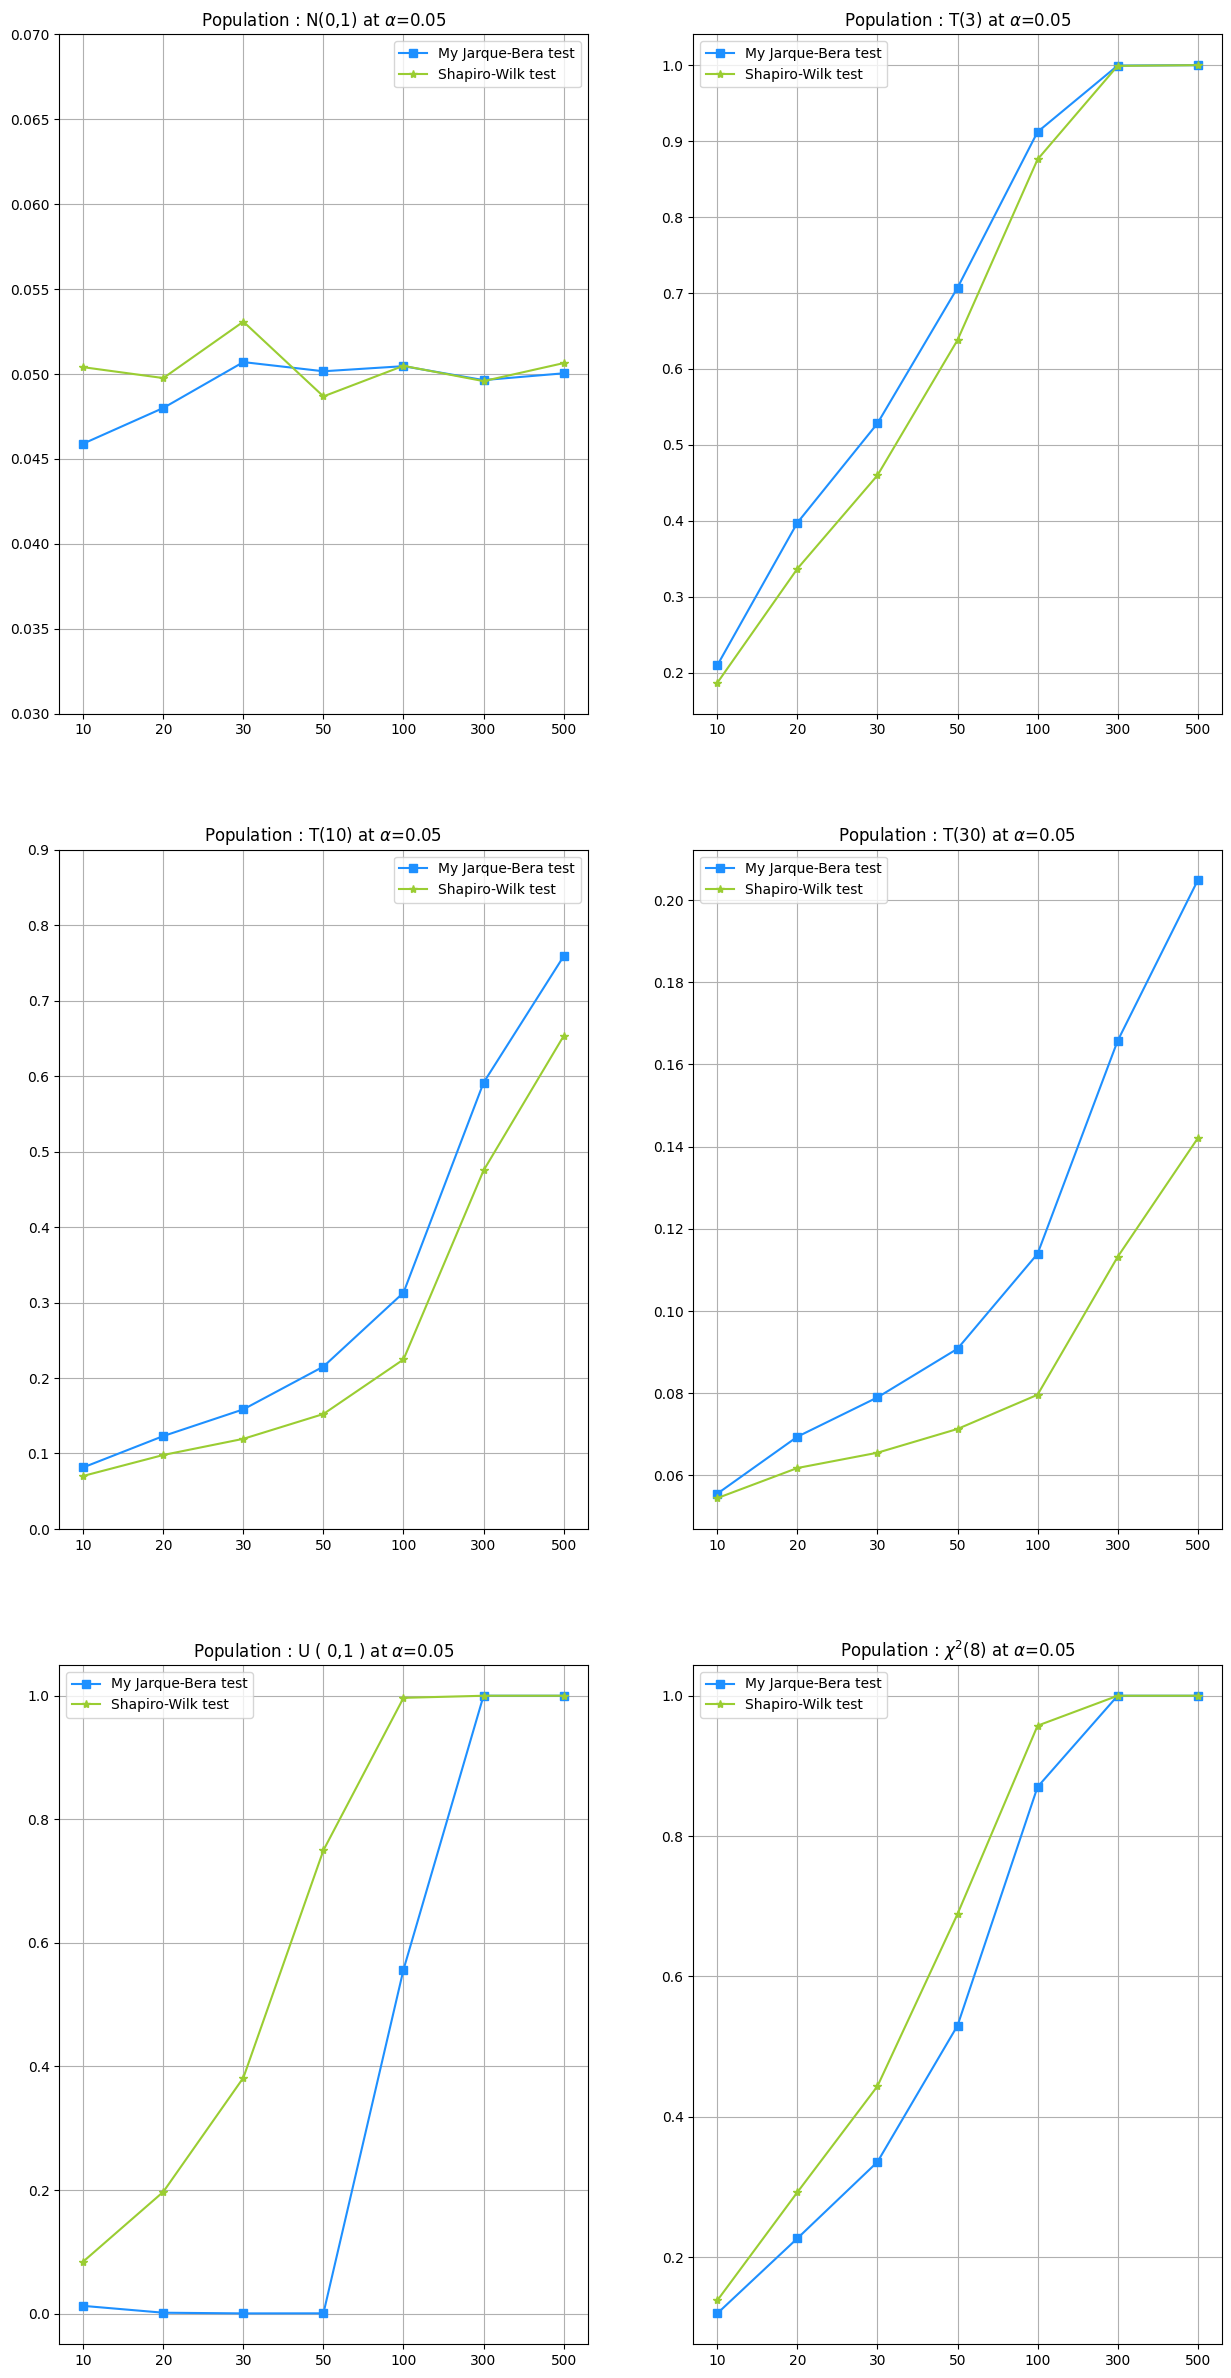

In [206]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import norm,t,chi2,uniform,shapiro  

n=[10,20,30,50,100,300,500]
N=50000 
alpha=0.05 # type 1 error
mu=0
std=1
df=2

def JB_test(x):
    n=x.shape[0] # 可得知資料集的數量
    G1=np.sqrt(n/6)*skew(x,bias=False)
    G2=np.sqrt(n/24)*kurtosis(x,bias=False)
    stats=G1**2+G2**2
    p_value=1-chi2.cdf(stats,df=df)
    return stats,p_value 

def data():
    n=[10,20,30,50,100,300,500]
    data=np.zeros(len(n))
    return data

def shapiro_n():
    N=50000
    data=np.zeros(N)
    return data 

power_ndis=data()
power_ttest3=data()
power_ttest10=data()
power_ttest30=data()
power_uni=data()
power_chi2=data()

shapiro_testNorm=data()
shapiro_ttest3=data()
shapiro_ttest10=data()
shapiro_ttest30=data()
shapiro_uni=data()
shapiro_chi2=data()

for i in range(len(n)):
    power_ndis[i]=(JB_test(norm.rvs(size=(n[i],N)))[1]<=alpha).mean()
    
for i in range(len(n)):
    power_ttest3[i]=(JB_test(t.rvs(df=3,size=(n[i],N)))[1]<=alpha).mean()
    
for i in range(len(n)):
    power_ttest10[i]=(JB_test(t.rvs(df=10,size=(n[i],N)))[1]<=alpha).mean()
    
for i in range(len(n)):
    power_ttest30[i]=(JB_test(t.rvs(df=30,size=(n[i],N)))[1]<=alpha).mean()

for i in range(len(n)):
    power_uni[i]=(JB_test(uniform.rvs(loc=mu,scale=std,size=(n[i],N)))[1]<=alpha).mean()
    
for i in range(len(n)):
    power_chi2[i]=(JB_test(chi2.rvs(df=8,size=(n[i],N)))[1]<=alpha).mean()
    
# 做shapiro norm 統計量 
shapiro_data1=shapiro_n() 
shapiro_data2=shapiro_n()
shapiro_data3=shapiro_n()
shapiro_data4=shapiro_n()
shapiro_data5=shapiro_n()
shapiro_data6=shapiro_n()
for i in range(len(n)):
    for j in range(N):
        shapiro_data1[j]=shapiro(norm.rvs(size=n[i]))[1]
    shapiro_testNorm[i]=(shapiro_data1<=alpha).mean()
    
for i in range(len(n)):
    for j in range(N):
        shapiro_data2[j]=shapiro(t.rvs(df=3,size=n[i]))[1]
    shapiro_ttest3[i]=(shapiro_data2<=alpha).mean()
    
for i in range(len(n)):
    for j in range(N):
        shapiro_data3[j]=shapiro(t.rvs(df=10,size=n[i]))[1]
    shapiro_ttest10[i]=(shapiro_data3<=alpha).mean()
    
for i in range(len(n)):
    for j in range(N):
        shapiro_data4[j]=shapiro(t.rvs(df=30,size=n[i]))[1]
    shapiro_ttest30[i]=(shapiro_data4<=alpha).mean()

for i in range(len(n)):
    for j in range(N):
        shapiro_data5[j]=shapiro(uniform.rvs(loc=mu,scale=std,size=(n[i])))[1]
    shapiro_uni[i]=(shapiro_data5<=alpha).mean()
    
for i in range(len(n)):
    for j in range(N):
        shapiro_data6[j]=shapiro(chi2.rvs(df=8,size=n[i]))[1]
    shapiro_chi2[i]=(shapiro_data6<=alpha).mean()
        
fig,axes=plt.subplots(3,2,figsize=(15,30))
axes[0][0].plot(np.arange(len(n)),power_ndis,marker="s",color="dodgerblue",label="My Jarque-Bera test")
axes[0][0].plot(np.arange(len(n)),shapiro_testNorm,marker="*",color="yellowgreen",label="Shapiro-Wilk test")
axes[0][0].set_ylim(0.03,0.07)
axes[0][0].set_xticks(np.arange(len(n)),labels=n)
axes[0][0].set_title("Population : N(0,1) at $\\alpha$=0.05")

axes[0][1].plot(np.arange(len(n)),power_ttest3,marker="s",color="dodgerblue",label="My Jarque-Bera test")
axes[0][1].plot(np.arange(len(n)),shapiro_ttest3,marker="*",color="yellowgreen",label="Shapiro-Wilk test")
axes[0][1].set_xticks(np.arange(len(n)),labels=n)
axes[0][1].set_title("Population : T(3) at $\\alpha$=0.05") 

axes[1][0].plot(np.arange(len(n)),power_ttest10,marker="s",color="dodgerblue",label="My Jarque-Bera test")
axes[1][0].plot(np.arange(len(n)),shapiro_ttest10,marker="*",color="yellowgreen",label="Shapiro-Wilk test")
axes[1][0].set_xticks(np.arange(len(n)),labels=n)
axes[1][0].set_title("Population : T(10) at $\\alpha$=0.05") 
axes[1][0].set_ylim([0,0.9])

axes[1][1].plot(np.arange(len(n)),power_ttest30,marker="s",color="dodgerblue",label="My Jarque-Bera test")
axes[1][1].plot(np.arange(len(n)),shapiro_ttest30,marker="*",color="yellowgreen",label="Shapiro-Wilk test")
axes[1][1].set_xticks(np.arange(len(n)),labels=n)
axes[1][1].set_title("Population : T(30) at $\\alpha$=0.05")

axes[2][0].plot(np.arange(len(n)),power_uni,marker="s",color="dodgerblue",label="My Jarque-Bera test")
axes[2][0].plot(np.arange(len(n)),shapiro_uni,marker="*",color="yellowgreen",label="Shapiro-Wilk test")
axes[2][0].set_xticks(np.arange(len(n)),labels=n)
axes[2][0].set_title("Population : U ( 0,1 ) at $\\alpha$=0.05")

axes[2][1].plot(np.arange(len(n)),power_chi2,marker="s",color="dodgerblue",label="My Jarque-Bera test")
axes[2][1].plot(np.arange(len(n)),shapiro_chi2,marker="*",color="yellowgreen",label="Shapiro-Wilk test")
axes[2][1].set_xticks(np.arange(len(n)),labels=n)
axes[2][1].set_title("Population : $\chi^{2}$(8) at $\\alpha$=0.05")

for i in range(3):
    for j in range(2):
        axes[i][j].legend()
        axes[i][j].grid(True)